In [1]:
# %pip install 'vanna[chromadb]'
# %pip install 'vanna[chromadb,snowflake,openai]'
# %pip install pydantic-settings -U
# https://vanna.ai/

[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE TABLE [Artist]\n(\n    [ArtistId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(120),\n    CONSTRAINT [PK_Artist] PRIMARY KEY  ([ArtistId])\n)\n\nCREATE TABLE [Album]\n(\n    [AlbumId] INTEGER  NOT NULL,\n    [Title] NVARCHAR(160)  NOT NULL,\n    [ArtistId] INTEGER  NOT NULL,\n    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),\n    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE TABLE [Track]\n(\n    [TrackId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(200)  NOT NULL,\n    [AlbumId] I

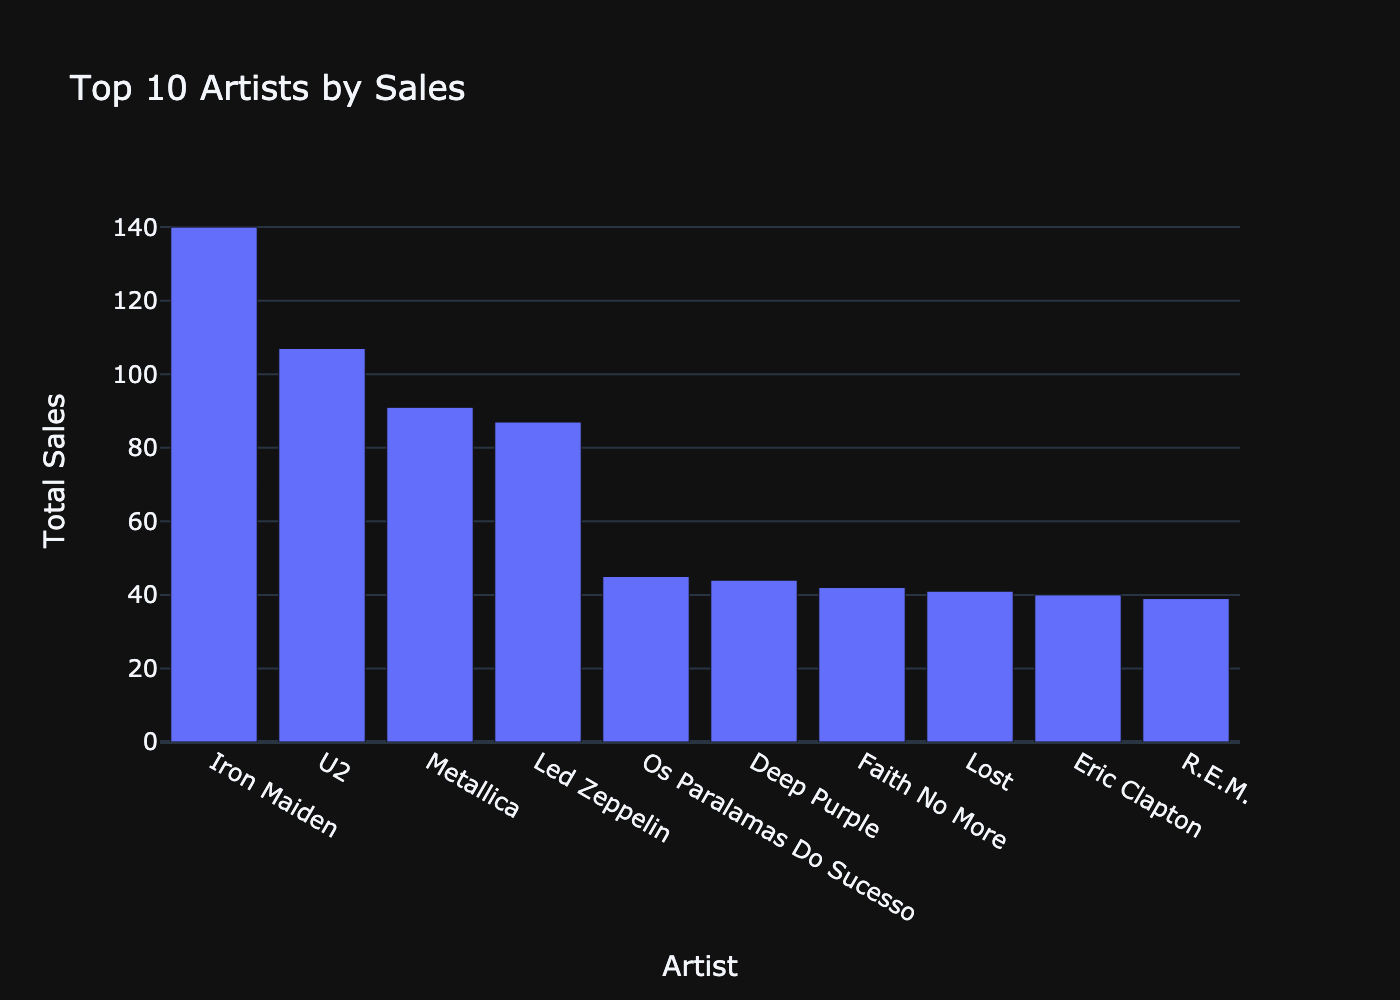

('SELECT a.ArtistId, a.Name, SUM(il.Quantity) AS TotalSales\nFROM Artist a\nJOIN Album al ON a.ArtistId = al.ArtistId\nJOIN Track t ON al.AlbumId = t.AlbumId\nJOIN InvoiceLine il ON t.TrackId = il.TrackId\nGROUP BY a.ArtistId, a.Name\nORDER BY TotalSales DESC\nLIMIT 10;',
    ArtistId                     Name  TotalSales
 0        90              Iron Maiden         140
 1       150                       U2         107
 2        50                Metallica          91
 3        22             Led Zeppelin          87
 4       113  Os Paralamas Do Sucesso          45
 5        58              Deep Purple          44
 6        82            Faith No More          42
 7       149                     Lost          41
 8        81             Eric Clapton          40
 9       124                   R.E.M.          39,
 None)

In [3]:
# Using Vanna on the cloud - Example
import sys, os
sys.path.append(os.path.abspath(os.path.join('../..', 'secret')))
from secret_info import vanna_api_key
import vanna
from vanna.remote import VannaDefault
# vn = VannaDefault(model='chinook', api_key=vanna.get_api_key('jpinzon@hotmail.com'))
vn = VannaDefault(model='chinook', api_key=vanna_api_key)
vn.connect_to_sqlite('https://vanna.ai/Chinook.sqlite')
vn.ask('What are the top 10 artists by sales?')

_____ 
# Training on local database

- Documentation
 
    https://vanna.ai/docs/sqlite-openai-standard-marqo.html

- Instructions

    In the below link, you can create a notebook and run it in Collab. It gave me the same error as running it here. 

    https://vanna.ai/docs/sqlite-openai-vanna-vannadb/

    With the following options:
            
        1. OpenAI via Vanna.AI
        
        2. Vanna Hosted Vector VannaDB 
        
        3. SQLite
        
        4. Fin Mon database

    To prevent errors during training (https://github.com/vanna-ai/vanna/discussions/216), the model needs to be added/initiatied/created online: 
    
    https://vanna.ai/account/send-email 
        
    or 
    
    https://vanna.ai/account/profile 
    

FREE SQLITE https://www.sqlitetutorial.net/sqlite-sample-database/


In [4]:
# IMPORT VANNA AND GET API KEY
import sys, os
sys.path.append(os.path.abspath(os.path.join('../..', 'secret')))
from secret_info import vanna_api_key

import vanna
from vanna.remote import VannaDefault
# api_key = vanna.get_api_key(your_email)

In [6]:
# This model needs to exists on vanna's system
vanna_model_name = 'finmodmodel'
path_to_database = '../../data/sin.db'
vn = VannaDefault(model=vanna_model_name, api_key=vanna_api_key)
vn.connect_to_sqlite(path_to_database)

In [ ]:
# Here you will train the model on your sqllite3 database. 
# If the model is already trained, you do not need to run the training again. 
# df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")
# df_ddl
# for ddl in df_ddl['sql'].to_list():
#   vn.train(ddl=ddl)

In [7]:
vn.ask('What are top 5 accounts with current balance?')

[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE TABLE "ACCT_TRANSACTIONS" (\n"id" INTEGER,\n  "ACCT_NM" TEXT,\n  "DATE" TIMESTAMP,\n  "BALANCE" REAL\n)\n\nCREATE TABLE "ACCT_TRANSACTIONS" (\n"id" INTEGER,\n  "ACCT_NM" TEXT,\n  "DATE" TIMESTAMP,\n  "BALANCE" REAL\n)\n\nCREATE TABLE "ACCT_TRANSACTIONS" (\n"id" INTEGER,\n  "ACCT_NM" TEXT,\n  "DATE" TIMESTAMP,\n  "BALANCE" REAL\n)\n\nCREATE TABLE "ACCT_OWR" (\n"id" INTEGER,\n  "ACCT_OWR_NM" TEXT,\n  "ACCT_OWR_CD" INTEGER,\n  "ACCT_OWR_SELF" TEXT,\n  "ACCT_ONE_OWR" TEXT\n)\n\nCREATE TABLE "ACCT_OWR" (\n"id" INTEGER,\n  "ACCT_OWR_NM" TEXT,\n  "ACCT_OWR_CD" INTEGER,\n  "ACCT_OWR_SELF" TEXT,\n  "ACCT_ONE_OWR

In [8]:
vn.ask('what was the latest change in value of the ALLY 401K Jorge account?')

[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE TABLE "ACCT_TRANSACTIONS" (\n"id" INTEGER,\n  "ACCT_NM" TEXT,\n  "DATE" TIMESTAMP,\n  "BALANCE" REAL\n)\n\nCREATE TABLE "ACCT_TRANSACTIONS" (\n"id" INTEGER,\n  "ACCT_NM" TEXT,\n  "DATE" TIMESTAMP,\n  "BALANCE" REAL\n)\n\nCREATE TABLE "ACCT_TRANSACTIONS" (\n"id" INTEGER,\n  "ACCT_NM" TEXT,\n  "DATE" TIMESTAMP,\n  "BALANCE" REAL\n)\n\nCREATE TABLE "ACCT_OWR" (\n"id" INTEGER,\n  "ACCT_OWR_NM" TEXT,\n  "ACCT_OWR_CD" INTEGER,\n  "ACCT_OWR_SELF" TEXT,\n  "ACCT_ONE_OWR" TEXT\n)\n\nCREATE TABLE "ACCT_OWR" (\n"id" INTEGER,\n  "ACCT_OWR_NM" TEXT,\n  "ACCT_OWR_CD" INTEGER,\n  "ACCT_OWR_SELF" TEXT,\n  "ACCT_ONE_OWR

In [9]:
vn.ask('How mauch money in savings')

[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE TABLE "ACCT_TRANSACTIONS" (\n"id" INTEGER,\n  "ACCT_NM" TEXT,\n  "DATE" TIMESTAMP,\n  "BALANCE" REAL\n)\n\nCREATE TABLE "ACCT_TRANSACTIONS" (\n"id" INTEGER,\n  "ACCT_NM" TEXT,\n  "DATE" TIMESTAMP,\n  "BALANCE" REAL\n)\n\nCREATE TABLE "ACCT_TRANSACTIONS" (\n"id" INTEGER,\n  "ACCT_NM" TEXT,\n  "DATE" TIMESTAMP,\n  "BALANCE" REAL\n)\n\nCREATE TABLE "invoices"\r\n(\r\n    [InvoiceId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    [CustomerId] INTEGER  NOT NULL,\r\n    [InvoiceDate] DATETIME  NOT NULL,\r\n    [BillingAddress] NVARCHAR(70),\r\n    [BillingCity] NVARCHAR(40),\r\n    [BillingState] NVARCHAR

In [11]:
import sqlite3
import pandas as pd
con = sqlite3.connect('../../data/chinook.db')

In [12]:
pd.read_sql('SELECT * FROM sqlite_master;', con)

,type,name,tbl_name,rootpage,sql
0,table,albums,albums,2,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,artists,artists,4,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,customers,customers,5,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,employees,employees,8,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,genres,genres,10,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,invoices,invoices,11,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,invoice_items,invoice_items,13,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,media_types,media_types,15,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,playlists,playlists,16,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [13]:
cur = con.cursor()
a = cur.execute("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [14]:
a.fetchall()

[('table',
  'CREATE TABLE "albums"\r\n(\r\n    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    [Title] NVARCHAR(160)  NOT NULL,\r\n    [ArtistId] INTEGER  NOT NULL,\r\n    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)'),
 ('table', 'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'CREATE TABLE "artists"\r\n(\r\n    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    [Name] NVARCHAR(120)\r\n)'),
 ('table',
  'CREATE TABLE "customers"\r\n(\r\n    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    [FirstName] NVARCHAR(40)  NOT NULL,\r\n    [LastName] NVARCHAR(20)  NOT NULL,\r\n    [Company] NVARCHAR(80),\r\n    [Address] NVARCHAR(70),\r\n    [City] NVARCHAR(40),\r\n    [State] NVARCHAR(40),\r\n    [Country] NVARCHAR(40),\r\n    [PostalCode] NVARCHAR(10),\r\n    [Phone] NVARCHAR(24),\r\n    [Fax] NVARCHAR(24),\r\n    [Email] NVARCHAR(60)  NOT NULL,\r\n    [SupportRepId] INTEGER,\r\